# Exploratory data analysis and visualizations:  average number of comments and PCA 

Since we gathered the data ourselves, the data seems pretty clean.  Now we try to interpret the data.  First we load modules, then recreate the data frame from [ProblemStatement](ProblemStatement.ipynb).

In [1]:
# For data frames
import pandas as pd

# Numerical calculations and arrays
import numpy as np

# PCA for data exploration
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Plotting
import matplotlib.pyplot as plt

# Timer
import time # for debugging

Define the `time_elapsed` function, then load the data and eliminate duplicates.

In [2]:
# Input is a start time and an end time
# Output is a print statement giving the time elapsed
def time_elapsed(start, end):
    # Compute time elapsed in seconds
    total_time_seconds = end-start 
    if total_time_seconds < 60:
        print("Total time elapsed =",total_time_seconds, "seconds")
    else:
        # In minutes 
        total_time_minutes = total_time_seconds/60 
        if total_time_minutes < 60: 
            print("Total time elapsed =", total_time_minutes, "minutes") 
        else: 
            # In hours
            total_time_hours = total_time_minutes/60 
            # Print the time elapsed in hours
            print("Total time elapsed =", total_time_hours, "hours") 

# Load the data
#start_load = time.time() # for debugging
raw_data = pd.read_csv("ProblemStatementOutputs/1026_03-05-2023_14-56-41.csv")
#end_load = time.time() # for debugging
#time_elapsed(start_load, end_load) # for debugging

# Delete any duplicates
# start_duplicates = time.time() # for debugging
# raw_data.duplicated(subset=["Title", "Author(s)"]) 
# end_duplicates = time.time() # for debugging
# time_elapsed(start_duplicates, end_duplicates) # for debugging
# raw_data # for debugging

Total time elapsed = 0.009640216827392578 seconds
Total time elapsed = 0.0019202232360839844 seconds


,Post type,Title,Post url,Author(s),Date and time posted,Tags,No. of comments
0,article,Which Republican Candidate Should Biden Be Mos...,https://fivethirtyeight.com/features/which-rep...,Amelia Thomson-DeVeaux; Kaleigh Rogers; Nathan...,"May 2, 2023, at 6:00 AM",Donald Trump; Joe Biden; Slack Chat; 2024 Elec...,27
1,podcast,Partisan Gerrymandering Is Legal Again In Nort...,https://fivethirtyeight.com/videos/partisan-ge...,Galen Druke; Nathaniel Rakich; Amelia Thomson-...,"May 1, 2023",Donald Trump; Politics Podcast; Video; Joe Bid...,6
2,podcast,Politics Podcast: Where Biden Stands Heading I...,https://fivethirtyeight.com/features/politics-...,Galen Druke; Nathaniel Rakich; Amelia Thomson-...,"May 1, 2023",FiveThirtyEight Podcasts; Politics Podcast; Jo...,4
3,article,The Real Reason Presidential Candidates Form E...,https://fivethirtyeight.com/features/the-real-...,Nathaniel Rakich,"Apr. 28, 2023, at 12:07 PM",2024 Election; 2024 Republican Primary; Campai...,6
4,article,Asa Hutchinson Promises To Be A Drama-Free Pre...,https://fivethirtyeight.com/features/asa-hutch...,Monica Potts,"Apr. 27, 2023, at 10:01 AM",2024 Election; 2024 Republican Primary; Arkans...,21
...,...,...,...,...,...,...,...
1021,podcast,Will Democrats Get Their Agenda Passed?,https://fivethirtyeight.com/videos/will-democr...,Galen Druke; Nate Silver; Sarah Frostenson; Al...,"Sep. 27, 2021",Politics Podcast; Video; Congress; Polling; De...,9
1022,podcast,Politics Podcast: How To Poll People About The...,https://fivethirtyeight.com/features/politics-...,Galen Druke; Alex Samuels was a politics repor...,"Sep. 27, 2021",FiveThirtyEight Podcasts; Politics Podcast; Co...,3
1023,article,Texas’s New Congressional Map Could Give A Hug...,https://fivethirtyeight.com/features/texass-ne...,Alex Samuels was a politics reporter at FiveTh...,"Sep. 27, 2021",Texas; Redistricting; Texas Politics,19
1024,article,Why Bipartisanship In The Senate Is Dying,https://fivethirtyeight.com/features/why-bipar...,Lee Drutman,"Sep. 27, 2021",Joe Biden; Congress; Senate Democrats; Senate ...,22


## Basic comments analysis

Next are some functions.  The first takes a string of features separated by semicolons, then converts it into a list with commas replacing the semicolons.  The second function that follows takes as input a feature and outputs its corresponding attribute (post type, author, or tag).  The other functions are used to take a list of features and create a data frame with the number of occurrences of that feature, the total number of comments, the average number of comments, and the median number of comments.

In [3]:
# Input is a string with items separated by semicolons
# Output is a list of the items
def with_commas(string):
    return string.split("; ")

# Input is a feature (under post type, author, or tag).
# Output is the attribute (Post type, Author(s), or Tags) for that feature.
def attr(feature):
    for column in raw_data.columns:
        #print("Column is "+str(column)+ ".") # for debugging
        for entry in raw_data[column]:
            entry_list = with_commas(str(entry)) #str(entry).split("; ")
            #print("Entry to check is "+str(entry_list)+".") # for debugging
            if feature in entry_list:
                attribute = column
                return attribute

# Input is one of the column titles "Post type", Author(s)", or "Tags" from the raw_data data frame.
# Output is an unordered list of the possible values for that attribute.
def attribute_features(attribute):
    all_features_with_repeats = []
    #print(raw_data[attribute]) # for debugging
    for feature_attr in raw_data[attribute]:
        #print(feature_attr) # for debugging
        feature_attr_list = with_commas(str(feature_attr)) #str(feature_attr).split("; ")
        for feature in feature_attr_list:
            all_features_with_repeats.append(feature) 
    all_features_list = [*set(all_features_with_repeats)]
    return all_features_list

# Input is a list of features (with attributes Post type, Author(s), or Tags).
# Output is a data frame with the features and the frequency with which they occur in the data.
def frequency_of_features(features):
    frequency_list = []
    for i in range(len(features)):
        occurrences = 0
        for index, row in raw_data.iterrows():
            authors_in_row_list = with_commas(str(row["Author(s)"])) #str(row["Author(s)"]).split("; ")
            tags_in_row_list = with_commas(str(row["Tags"])) #str(row["Tags"]).split("; ")
            if (features[i] in row["Post type"]) or (features[i] in authors_in_row_list) or (features[i] in tags_in_row_list):
                occurrences = occurrences +1
        frequency_list.append(occurrences)
    dict = {
        "Features":features,
        "Frequency":frequency_list
    }    
    return pd.DataFrame(dict, columns=["Features", "Frequency"])    
                
# Input is one of the column titles "Post type", Author(s)", or "Tags" from the raw_data data frame.
# Output is a data frame containing the frequency, total number of comments, average number of comments, 
    # and median number of comments, sorted by the average number of comments, then the median.
def comments_analysis(attribute):
    all_features_list = attribute_features(attribute)
    attr_total_comments_list, attr_avg_no_of_comments_list, attr_median_no_of_comments_list = ([] for i in range(3))
    for i in range(len(all_features_list)):
        comments = 0
        comments_data_list = []
        for index, row in raw_data.iterrows():
            attr_in_row_list = with_commas(str(row[attribute])) #str(row[attribute]).split("; ")
            if all_features_list[i] in attr_in_row_list:
                comments = comments + int(row["No. of comments"])
                comments_data_list.append(row["No. of comments"])
        #print("comments_data_list =", comments_data_list) # for debugging
        #print("Mean of comments_data_list is "+ str(np.mean(comments_data_list))+".") # for debugging  
        #print("Median of comments_data_list is "+ str(np.median(comments_data_list))+".") # for debugging
        attr_total_comments_list.append(comments) 
        attr_avg_no_of_comments_list.append(np.mean(comments_data_list))
        attr_median_no_of_comments_list.append(np.median(comments_data_list))
    attr_comments_info = frequency_of_features(all_features_list)
    attr_comments_info["Total no. of comments"] = attr_total_comments_list
    attr_comments_info["Avg no. of comments"] = attr_avg_no_of_comments_list
    attr_comments_info["Median no. of comments"] = attr_median_no_of_comments_list    
    return attr_comments_info#.sort_values(by = ["Avg no. of comments", "Median no. of comments"], ascending = [False, False])

We can visualize the comments analyses for each of Post type, Author(s), and Tags by plotting the number of comments (total, average, median) against the frequency of each attribute.

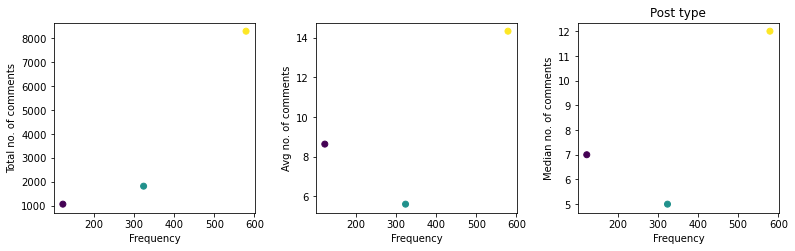

In [11]:
# Post type comments analysis
post_type_comments = comments_analysis("Post type")
#print(post_type_comments) # for debugging

# Now plot the data
fig_post_type, ax_post_type = plt.subplots(1, 3, figsize=(13,3.5), sharex=True)

# Spacing between plots
plt.subplots_adjust(wspace=0.3)

# Plots
ax_post_type[0].scatter(post_type_comments["Frequency"].values.tolist(), 
        post_type_comments["Total no. of comments"].values.tolist(),
        c=post_type_comments.index.values,
        cmap='viridis')

ax_post_type[1].scatter(post_type_comments["Frequency"].values.tolist(), 
        post_type_comments["Avg no. of comments"].values.tolist(),
        c=post_type_comments.index.values,
        cmap='viridis')

ax_post_type[2].scatter(post_type_comments["Frequency"].values.tolist(), 
        post_type_comments["Median no. of comments"].values.tolist(),
        c=post_type_comments.index.values,
        cmap='viridis')

# Axes labels
ax_post_type[0].set_xlabel("Frequency")
ax_post_type[0].set_ylabel("Total no. of comments")
ax_post_type[1].set_xlabel("Frequency")
ax_post_type[1].set_ylabel("Avg no. of comments")
ax_post_type[2].set_xlabel("Frequency")
ax_post_type[2].set_ylabel("Median no. of comments")

plt.title("Post type")

# Legend
# plt.legend(handles=ax_post_type[0].legend_elements()[0], # handles parameter from https://datavizpyr.com/
#            labels=["article", "video", "podcast"],
#            title="Features")

plt.show()

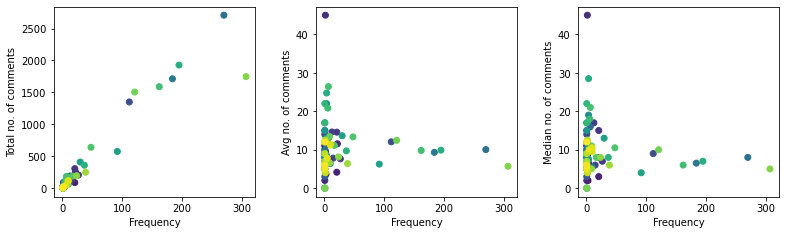

In [5]:
# Authors comments analysis
authors_comments = comments_analysis("Author(s)")

# Now plot the data
fig_authors, ax_authors = plt.subplots(1, 3, figsize=(13,3.5), sharex=True)

# Spacing between plots
plt.subplots_adjust(wspace=0.3)

# Plots
ax_authors[0].scatter(authors_comments["Frequency"].values.tolist(), 
        authors_comments["Total no. of comments"].values.tolist(),
        c=authors_comments.index.values,
        cmap='viridis')

ax_authors[1].scatter(authors_comments["Frequency"].values.tolist(), 
        authors_comments["Avg no. of comments"].values.tolist(),
        c=authors_comments.index.values,
        cmap='viridis')

ax_authors[2].scatter(authors_comments["Frequency"].values.tolist(), 
        authors_comments["Median no. of comments"].values.tolist(),
        c=authors_comments.index.values,
        cmap='viridis')

# Axes labels
ax_authors[0].set_xlabel("Frequency")
ax_authors[0].set_ylabel("Total no. of comments")
ax_authors[1].set_xlabel("Frequency")
ax_authors[1].set_ylabel("Avg no. of comments")
ax_authors[2].set_xlabel("Frequency")
ax_authors[2].set_ylabel("Median no. of comments")

# Legend
# plt.legend(handles=ax_post_type[0].legend_elements()[0], # handles parameter from https://datavizpyr.com/
#            labels=["article", "video", "podcast"],
#            title="Features")

plt.show()

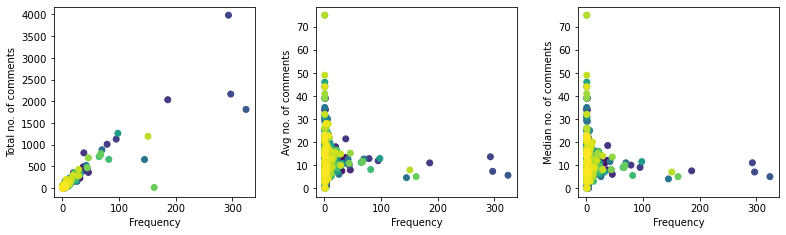

In [6]:
# Tags comments analysis
tags_comments = comments_analysis("Tags")

# Now plot the data
fig_tags, ax_tags = plt.subplots(1, 3, figsize=(13,3.5), sharex=True)

# Spacing between plots
plt.subplots_adjust(wspace=0.3)

# Plots
ax_tags[0].scatter(tags_comments["Frequency"].values.tolist(), 
        tags_comments["Total no. of comments"].values.tolist(),
        c=tags_comments.index.values,
        cmap='viridis')

ax_tags[1].scatter(tags_comments["Frequency"].values.tolist(), 
        tags_comments["Avg no. of comments"].values.tolist(),
        c=tags_comments.index.values,
        cmap='viridis')

ax_tags[2].scatter(tags_comments["Frequency"].values.tolist(), 
        tags_comments["Median no. of comments"].values.tolist(),
        c=tags_comments.index.values,
        cmap='viridis')

# Axes labels
ax_tags[0].set_xlabel("Frequency")
ax_tags[0].set_ylabel("Total no. of comments")
ax_tags[1].set_xlabel("Frequency")
ax_tags[1].set_ylabel("Avg no. of comments")
ax_tags[2].set_xlabel("Frequency")
ax_tags[2].set_ylabel("Median no. of comments")

# Legend
# plt.legend(handles=ax_post_type[0].legend_elements()[0], # handles parameter from https://datavizpyr.com/
#            labels=["article", "video", "podcast"],
#            title="Features")

plt.show()

## PCA analysis and pruning features

Some of the features (authors and tags) appear so few times that they are not very helpful.  Also, some of the tags like "Politics Podcast" and "Video" don't really give any information about the content, and since they appear frequently they disrupt the analysis of the rest of the data.  The following functions give ways to prune the features a little bit.  

In [7]:
# First input is a list of features, second input is a list of features to be removed.
# Output is the first list of features with those in the second list removed.  
def prune(all_features, remove_features):
    pruned_features = all_features
    for feature in remove_features:
        pruned_features.remove(feature)
    return pruned_features    

# Input is a list of features (authors and tags).  Needs raw_data, attr, and frequency_of_features. 
# Output is the list with features that appear less than 2% of the time removed.
def most_used(features):
    frequencies = frequency_of_features(features)
    relevant_rows_list_with_repeats = []
    for feature in features:
        attribute = attr(feature)
        for entries in raw_data[attribute]:
            entries_list = with_commas(str(entries)) #str(entries).split("; ")
            if feature in entries_list:
                relevant_rows_list_with_repeats.append(np.array(raw_data.loc[raw_data[attribute] == entries].values.tolist()).flatten().tolist())            
    #print("Type for relevant_rows_list_with_repeats is "+str(type(relevant_rows_list_with_repeats))+".") # for debugging
    #print("Type for an item in relevant_rows_list_with_repeats is "+str(type(relevant_rows_list_with_repeats[0]))+".") # for debugging        
    #print("Relevant rows list (with repeats) is "+str(relevant_rows_list_with_repeats)+".") # for debugging
    relevant_rows_list_no_repeats = []
    for list_item in relevant_rows_list_with_repeats:
        if list_item not in relevant_rows_list_no_repeats:
            relevant_rows_list_no_repeats.append(list_item)
    total_data_points = len(relevant_rows_list_no_repeats) 
    #print("Total number of data points = "+str(total_data_points)+", compared to "+str(len(raw_data.index))+".") # for debugging
    most_used = []
    for feature in features:
        #print("Feature is "+str(feature)+".") # for debugging
        #print("The row containing "+str(feature)+" is: "+str(frequencies.loc[frequencies["Features"]==feature])+".") # for debugging
        fraction_of_appearances = int(frequencies.loc[frequencies["Features"]==feature]["Frequency"])/total_data_points
        #print("Fraction of appearances is "+str(fraction_of_appearances)+".") # for debugging
        if fraction_of_appearances > 0.02:
            most_used.append(feature)
    return most_used 

It seems like many of the tags in particular tend to appear together, and maybe certain authors produce content with certain tags, or other features are correlated.  We can do a PCA (principal component analysis) on all the features first to find ways to group features that are correlated.  The following function creates a posts v. features matrix.

In [8]:
# Input is a list of any combination of features from post types, authors, or tags found in raw_data.
# Output is a data frame whose rows are the post titles and whose columns are the features.
    # (Must remove the labels when inputting data into PCA analysis.)
def PCA_input(features):
    matrix = [raw_data["Title"].values.tolist()]
    #print("Rows are:\n", matrix) # for debugging
    for feature in features:
        #print("Feature is "+feature+".\n") # for debugging
        occurrences_list = []
        for index, row in raw_data.iterrows():
            #print("Row for "+row["Title"]+":") # for debugging
            for attribute in raw_data.columns.values.tolist():
                #print("Attribute is "+attribute+".") # for debugging
                # Turn all values of an attribute into a list
                attribute_list = with_commas(str(row[attribute])) #str(row[attribute]).split("; ")
                if feature in attribute_list:
                    #print(str(feature)+" is in "+str(row[attribute])+".") # for debugging
                    occurrences_list.append(1)
            #print("The length of the occurrences_list is "+str(len(occurrences_list))+".") # for debugging
            #print("The index is "+str(index)+".") # for debugging
            if len(occurrences_list) != index+1:
                occurrences_list.append(0) 
        #print("occurrences_list = ", occurrences_list, "\n") # for debugging       
        matrix.append(occurrences_list) 
    print(matrix) # for debugging    
    return pd.DataFrame(np.array(matrix).transpose(), columns = ["Post"]+features)               

Now we run PCA on all the post types, authors, and tags.

In [13]:
all_features = attribute_features("Post type") + attribute_features("Author(s)") + attribute_features("Tags")
# Create the PCA input matrix
start_input = time.time() # for debugging
posts_v_features_matrix = PCA_input(all_features)
end_input = time.time() # for debugging
time_elapsed(start_input, end_input) # for debugging
#print("Post v. features matrix is: \n", post_v_features_matrix) # for debugging

# Make the PCA objects
scaler = StandardScaler()
pca = PCA()

# Fit the PCA
features_scaled = scaler.fit_transform(posts_v_features_matrix[posts_v_features_matrix.columns[1:]])
pca.fit(features_scaled)

# Get the PCA components
component_vectors_all_features = pd.DataFrame(pca.components_.transpose(), index = posts_v_features_matrix.columns[1:])
component_vectors_all_features.sort_values(by = component_vectors_all_features.columns[0], ascending = False)

[['Which Republican Candidate Should Biden Be Most Afraid Of?', 'Partisan Gerrymandering Is Legal Again In North Carolina', 'Politics Podcast: Where Biden Stands Heading Into 2024 ', 'The Real Reason Presidential Candidates Form Exploratory Committees', 'Asa Hutchinson Promises To Be A Drama-Free President. Is That What GOP Voters Want?', 'What To Do About A Problem Like Dianne Feinstein?', 'Biden’s Reelection Bid By The Numbers', 'Biden Is Running For Reelection. What Are His Chances For 2024?', "Politics Podcast: Are America's Favorite Governors Really All Republicans? ", 'Why Dianne Feinstein Might Actually Have To Resign', 'Trump Is Racking Up Endorsements In Florida. Should DeSantis Be Worried?', 'Live From New York: Will AI Replace This Podcast?', "Live From New York: It's The FiveThirtyEight Politics Podcast! ", 'The Fox News Defamation Trial Hurt Trust Among Some Viewers', 'Earth Day Is The Victim Of Its Own Success', 'Red States Are Trying To Fight The World On Climate', 'What

C:\Users\leyjf\AppData\Local\Temp\ipykernel_128228\4236066646.py:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return pd.DataFrame(np.array(matrix).transpose(), columns = ["Post"]+features)


ValueError: Shape of passed values is (819, 1), indices imply (819, 819)

Now we prune the tags a little bit, then run PCA on what's left.

In [9]:
# Remove unuseful tags
#print("Initial tags are "+str(attribute_features("Tags"))+".") # for debugging
#print("There are "+str(len(attribute_features("Tags")))+" of them.") # for debugging
tags_pruned = prune(attribute_features("Tags"), ["Politics Podcast", 
                                                  "Video", "Featured video", "FiveThirtyEight Podcasts"#,
#                                                 "Slack Chat", "Do You Buy That"
                                                ])
#print("tags_pruned =", tags_pruned) # for debugging
#print("Length of tags_pruned is "+str(len(tags_pruned))+".") # for debugging
final_tags = most_used(tags_pruned)
print("Final tags are "+ str(final_tags)+".  There are "+str(len(final_tags))+" of them.") # for debugging

# Create the matrix for tags
posts_v_features_matrix = PCA_input(final_tags)
#print("Post v. features matrix is: \n", post_v_features_matrix) # for debugging

# Make the PCA objects
scaler = StandardScaler()
pca = PCA()

# Fit the PCA
features_scaled = scaler.fit_transform(posts_v_features_matrix[posts_v_features_matrix.columns[1:]])
pca.fit(features_scaled)

# Get the PCA components
component_vectors_pruned_tags = pd.DataFrame(pca.components_.transpose(), index = posts_v_features_matrix.columns[1:])
component_vectors_pruned_tags.sort_values(by = component_vectors_pruned_tags.columns[0], ascending = False)

Final tags are ['Democrats', 'Do You Buy That', '2024 Presidential Election', 'Public Opinion', 'Gerrymandering', 'Jan. 6 Investigation', 'Polls', 'Slack Chat', '2022 Primaries', 'January 6th', 'Election Update', '2022 Midterms', 'Republican Party', 'Joe Biden', 'SCOTUS', 'Abortion', '2022 Election', 'Redistricting', 'Pollapalooza', 'Model Talk', '2024 Republican Primary', 'State Legislatures', 'Senate', 'Republicans', 'Donald Trump', 'Roe V. Wade', 'Ukraine', 'Inflation', 'Ron DeSantis', 'Congress', 'Polling', 'Georgia', 'Presidential Approval', '2022 Governors Elections', 'Supreme Court', 'The Biden Administration', 'Nate Silver', 'COVID-19', '2024 Election', '2022 House Elections', '2022 Senate Elections', 'Access To Abortion', 'Election Deniers'].  There are 43 of them.
[['Which Republican Candidate Should Biden Be Most Afraid Of?', 'Partisan Gerrymandering Is Legal Again In North Carolina', 'Politics Podcast: Where Biden Stands Heading Into 2024 ', 'The Real Reason Presidential Ca

C:\Users\leyjf\AppData\Local\Temp\ipykernel_128228\4236066646.py:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return pd.DataFrame(np.array(matrix).transpose(), columns = ["Post"]+features)


ValueError: Shape of passed values is (44, 1), indices imply (44, 44)